# Two Sample Location Z-test

This test is meant to validate an hypothetical difference between the true means of two groups, we sample each of the groups and similar to the one sample variant, we compute the probability of having seen some difference between each sample's mean.

The intuition is that because of CLT, both samples' means will converge to their true mean as the sample size grows, and at the same time the variance of the samples' means will reduce with the larger sample size, so as $n \to \infty$ the probability of having seen the obtained difference between the samples' means will be higher. To demonstrate we will consider two populations: men and women, that present a difference between their mean heights:

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# In centimeters
mu_w, mu_m = 165, 175
sigma_w, sigma_m = 7, 8

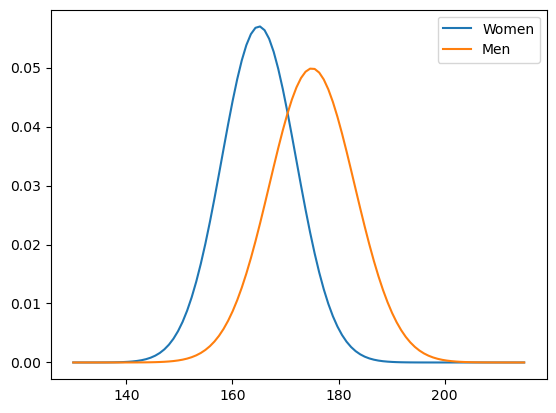

In [5]:
normal_dist_women = norm(mu_w, sigma_w)  # mean and std
normal_dist_men = norm(mu_m, sigma_m)

x = np.linspace(mu_w-5*sigma_w, mu_m+5*sigma_m, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, normal_dist_women.pdf(x), label="Women")
ax.plot(x, normal_dist_men.pdf(x), label="Men")
ax.legend()

Sampling both groups with $n=30$ and calculating the difference between both sample means:

In [8]:
n = 30
np.random.seed(1)

m_w = normal_dist_women.rvs(n).mean()
m_m = normal_dist_men.rvs(n).mean()

print("Women:", m_w, "Men:", m_m)
m_m - m_w

Women: 164.58042762541064 Men: 175.6125406439531


11.032113018542475

Similar to the one sample variant the goal of the test is to reject or not a chosen null hypothesis, for this problem we might say that the $H_{0}$ is that there isn't any difference between the groups true heights $H_{0} : \mu_{m} - \mu_{w} = 0$, if this was true then what would be the probability of having observed $m_{m} - m_{w} = 11.03$ ?

If $H_{0}$ were true then our distribution for the sample statistic $\bar{X_{m}} - \bar{X_{w}}$ would be distributed around 0, so we can construct the numerator of the Z-score by substracting $\mu_{m} - \mu_{w}$ from $\bar{X_{m}} - \bar{X_{w}}$. Since we now have two random variables, one for each group mean, and we are adding them, we have to consider the effects on the variance of the standard error.

Given two random variables $X$ and $Y$, the variance of their sum or difference is given by:

$$
\begin{align}
Var[X \pm Y] &= Var[X] + Var[Y] \\
Var[X \pm Y] &= \sigma_{x}^2 + \sigma_{y}^2 \\
\sigma_{xy} &= \sqrt{\sigma_{x}^2 + \sigma_{y}^2}
\end{align}
$$

Therefore if we have two sampling error distributions with standard deviation $\frac{\sigma}{\sqrt{n}}$, our combined variance is:

$$
\begin{align}
Var[\mu_{m0} - \mu_{w0}] &= \frac{\sigma_{m}^2}{n} +  \frac{\sigma_{w}^2}{n} \\
SE &= \sqrt{\frac{\sigma_{m}^2}{n} +  \frac{\sigma_{w}^2}{n}}
\end{align}
$$

With this logic we can compute the variance around an hypothetical $\mu_{m} - \mu_{w}$, obtained by drawing two independent samples of a given size, this variance is the standard error:

In [12]:
se = np.sqrt(sigma_m**2 / n + sigma_w**2 / n)

And with it we can now compute a standardized Z-score:

$$
Z = \frac{(\bar{X_{a}} - \bar{X_{b}}) - (\mu_{a} - \mu_{b})}{\sqrt{\frac{\sigma_{a}^2}{n} + \frac{\sigma_{b}^2}{n}}}
$$

Notice however that we required  to know both population variances $\sigma_{m}, \sigma_{w}$, which in a real setting might not be possible (see t-test).

We can now answer the probability of  having observed $m_{m} - m_{w} = 11.03$ if $H_{0} : \mu_{m} - \mu_{w} = 0$ were true, first compute the standardized Z-score:

In [13]:
z = ((m_m - m_w) - 0) / se
z

5.684340801763334

Translating the Z-score to a two tailed test, how probable is the difference between group heights to be more extreme than 5.68 standard deviations away from the mean?

In [14]:
st_dist = norm(0, 1)  # mean and std
p_nz = st_dist.cdf(-np.abs(z))  # The probability to observe from [-inf, -z]
p_pz = st_dist.cdf(np.abs(z))  # Probability to observe from [-inf, z]
p_extreme = 1 - (p_pz - p_nz)
p_extreme

1.3131818077383173e-08

Extremely unlikely, if the true difference of $\mu_{m} - \mu_{w} = 0$, then the probability of having observed $m_{m} - m_{w} = 11.03$ is $1.31 *10^{-8}$

## Confidence Interval

Analog to what we did in the one sample variant, we can construct an interval in such a way that some % of them  will contain the true difference between group means. Computing a 95% confidence interval for our sample:

In [15]:
min_diff = (m_m - m_w) - 1.96*se
max_diff = (m_m - m_w) + 1.96*se

min_diff, max_diff

(7.22816419308929, 14.83606184399566)

Same properties apply as in the one sample variant, we validate that 95% of the intervals constructed in this manner do contain the true difference between population means.

In [16]:
n = 30

np.random.seed(1)
# Means of 1000 samples
ms = np.array([normal_dist_men.rvs(n).mean() - normal_dist_women.rvs(n).mean() for i in range(1000)])

In [18]:
intervals = np.array([
    (
        m - (1.96 * se),
        m - (-1.96 * se)
    )
    for m in ms
])

param_in_interval = (ms - (1.96 * se) <= mu_m - mu_w) & (mu_m - mu_w <= ms - (-1.96 * se))  # Those where parameter is in interval
# What is the ratio of missed intervals
param_in_interval.sum() / 1000

0.952